In [1]:
import numpy as np
import matplotlib.pyplot as plt

Implement a function taking X and K as input that returns Phi(X) of shape NxK, the Vandermonde Matrix ass. with X

Possibly, build it column by column 

In [2]:
def vander(X, k):
    N = len(X)

    #Initialization
    phi = np.zeros((N,k))

    for i in range(k):
        phi[:,i] = X**i 

    return phi


X = np.linspace(0, 1, 100)
print(vander(X, 3))

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.01010101e-02 1.02030405e-04]
 [1.00000000e+00 2.02020202e-02 4.08121620e-04]
 [1.00000000e+00 3.03030303e-02 9.18273646e-04]
 [1.00000000e+00 4.04040404e-02 1.63248648e-03]
 [1.00000000e+00 5.05050505e-02 2.55076013e-03]
 [1.00000000e+00 6.06060606e-02 3.67309458e-03]
 [1.00000000e+00 7.07070707e-02 4.99948985e-03]
 [1.00000000e+00 8.08080808e-02 6.52994592e-03]
 [1.00000000e+00 9.09090909e-02 8.26446281e-03]
 [1.00000000e+00 1.01010101e-01 1.02030405e-02]
 [1.00000000e+00 1.11111111e-01 1.23456790e-02]
 [1.00000000e+00 1.21212121e-01 1.46923783e-02]
 [1.00000000e+00 1.31313131e-01 1.72431385e-02]
 [1.00000000e+00 1.41414141e-01 1.99979594e-02]
 [1.00000000e+00 1.51515152e-01 2.29568411e-02]
 [1.00000000e+00 1.61616162e-01 2.61197837e-02]
 [1.00000000e+00 1.71717172e-01 2.94867871e-02]
 [1.00000000e+00 1.81818182e-01 3.30578512e-02]
 [1.00000000e+00 1.91919192e-01 3.68329762e-02]
 [1.00000000e+00 2.02020202e-01 4.081216

In [3]:
#Create the test problem
N = 100 #nu,ber of datapoints
k = 4 #correct degree of polynomial

#Define the domain
a = 0
b = 1

#Deine the true solution
theta_true = np.ones((k,))

#Define the matrix phi
#linspace of X in [a,b]
X = np.linspace(a, b, N)

#Define Y such that theta_true is the solution of phi(X)*theta = Y
Phi = vander(X, k)
Y = Phi @ theta_true

In [4]:
#Corrupt Y with noise
sigma = 0.1 #varince of the noise
gaussian_noise = np.random.normal(0, 1, Y.shape)
Y = Y + sigma * gaussian_noise #Noisy Y

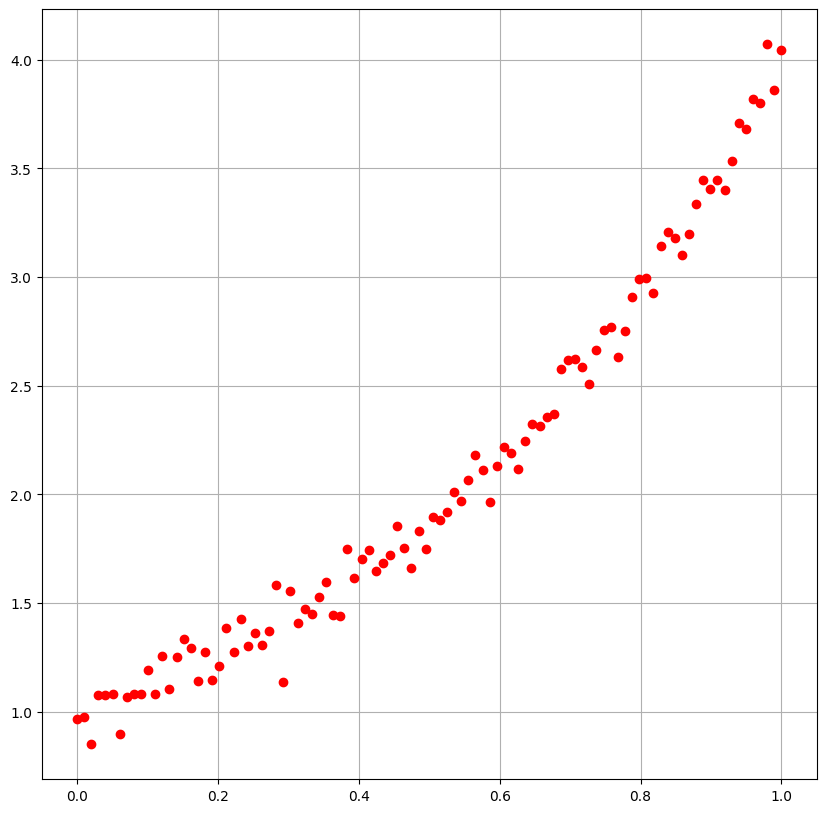

In [5]:
#Plot X against Y, with red dots (not continuos line)
plt.figure(figsize=(10,10))
plt.plot(X, Y, 'ro')
plt.grid()
plt.show()

[ 0.96536117  1.49766564 -0.34283234  1.90981337]


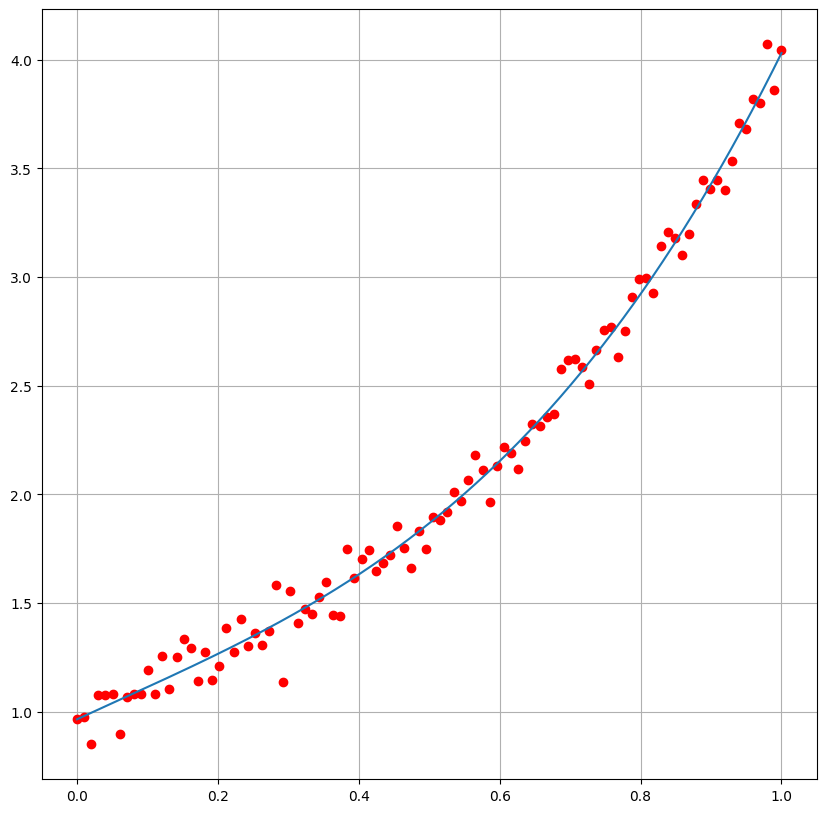

In [7]:
#Given X and Y, compute a solution theta_mle

#theta_mle = (np.linalg.inv(Phi.T @ Phi)) @ Phi.T @ Y  NO! NEVER COMPUTE THE INVERSE
theta_mle = np.linalg.solve(Phi.T @ Phi, Phi.T @ Y)
print(theta_mle)
#sostituire solve con cholesky e solution of triangolar system --> altrimenti è ancora inefficeinte!!!!! DA FARE

#To do: plot f_theta(x) in the same plot of X and Y to check the approximation



XX = np.linspace(a, b, 1000)    #another input vector with more point so a more resoluted space (we want the result plot to be smoothed)
YY = vander(XX, k) @ theta_mle

plt.figure(figsize=(10,10))
plt.plot(X, Y, 'ro')
plt.plot(XX, YY)
plt.grid()
plt.show()


overfitting

- if k is too low --> straight line
- if k is ok --> quite a perfetc approx (extrsct knowledge)
- if k is too large --> the model is too flexible (perfectly interpolates but it just memorizes) _overfitting_


In [ ]:
# X and Y are fixed

# Pretend not to know k
k_trial = 2 #assumed

#Solve MLE with k_trial=2
Phi_trial = vander(X, k_trial)
theta_mle_trial = np.linalg.solve(Phi_trial.T @ Phi_trial, Phi_trial.T @ Y)

#Plot the new model on the same plot of the dataset
a = 0
b = 1

XX_trial = np.linspace(a, b, 1000)    #another input vector with more point so a more resoluted space (we want the result plot to be smoothed)
YY_trial = vander(XX_trial, k_trial) @ theta_mle_trial

plt.figure(figsize=(10,10))
plt.plot(X, Y, 'ro')
plt.plot(XX_trial, YY_trial)
plt.grid()
plt.show()

^this is underfitting

In [ ]:
# X and Y are fixed

# Pretend not to know k
k_trial = 20 #assumed

#Solve MLE with k_trial=2
Phi_trial = vander(X, k_trial)
theta_mle_trial = np.linalg.solve(Phi_trial.T @ Phi_trial, Phi_trial.T @ Y)

#Plot the new model on the same plot of the dataset
a = 0
b = 1

XX_trial = np.linspace(a, b, 1000)    #another input vector with more point so a more resoluted space (we want the result plot to be smoothed)
YY_trial = vander(XX, k_trial) @ theta_mle_trial

plt.figure(figsize=(10,10))
plt.plot(X, Y, 'ro')
plt.plot(XX_trial, YY_trial)
plt.grid()
plt.show()

^ this is overfitting

# MAP

In [ ]:
#X and Y are fixed

#Set ktrial
k_trial = 30

#Set lambda (do not call the variable lambda) 
lmbda = 1  #if lambda=0 i get MLE

#Vompute he vandrmonde for the problem
Phi = vander(X, k_trial)

#Solve the hteta_MAP
theta_MAP = np.linalg.solve((Phi.T @ Phi) + (lmbda * np.identity(k_trial)), Phi.T@Y)


#Solve MAP with k_trial
Phi_trial = vander(X, k_trial)
theta_map_trial = np.linalg.solve((Phi.T @ Phi) + (lmbda * np.identity(k_trial)), Phi.T@Y)


#Plot the new model on the same plot of the dataset
a = 0
b = 1

XX_trial = np.linspace(a, b, 1000)    #another input vector with more point so a more resoluted space (we want the result plot to be smoothed)
YY_trial = vander(XX, k_trial) @ theta_map_trial

plt.figure(figsize=(10,10))
plt.plot(X, Y, 'ro')
plt.plot(XX_trial, YY_trial)
plt.grid()
plt.show()

In [ ]:
#X and Y are fixed

#Set ktrial
k_trial = 30

#Set lambda (do not call the variable lambda) 
lmbda = 50 

#Vompute he vandrmonde for the problem
Phi = vander(X, k_trial)

#Solve the hteta_MAP
theta_MAP = np.linalg.solve((Phi.T @ Phi) + (lmbda * np.identity(k_trial)), Phi.T@Y)


#Solve MAP with k_trial
Phi_trial = vander(X, k_trial)
theta_map_trial = np.linalg.solve((Phi.T @ Phi) + (lmbda * np.identity(k_trial)), Phi.T@Y)


#Plot the new model on the same plot of the dataset
a = 0
b = 1

XX_trial = np.linspace(a, b, 1000)    #another input vector with more point so a more resoluted space (we want the result plot to be smoothed)
YY_trial = vander(XX, k_trial) @ theta_map_trial

plt.figure(figsize=(10,10))
plt.plot(X, Y, 'ro')
plt.plot(XX_trial, YY_trial)
plt.grid()
plt.show()

^ underfitting (if lambda is too big -> underfit)